# Facial Keypoints Detection

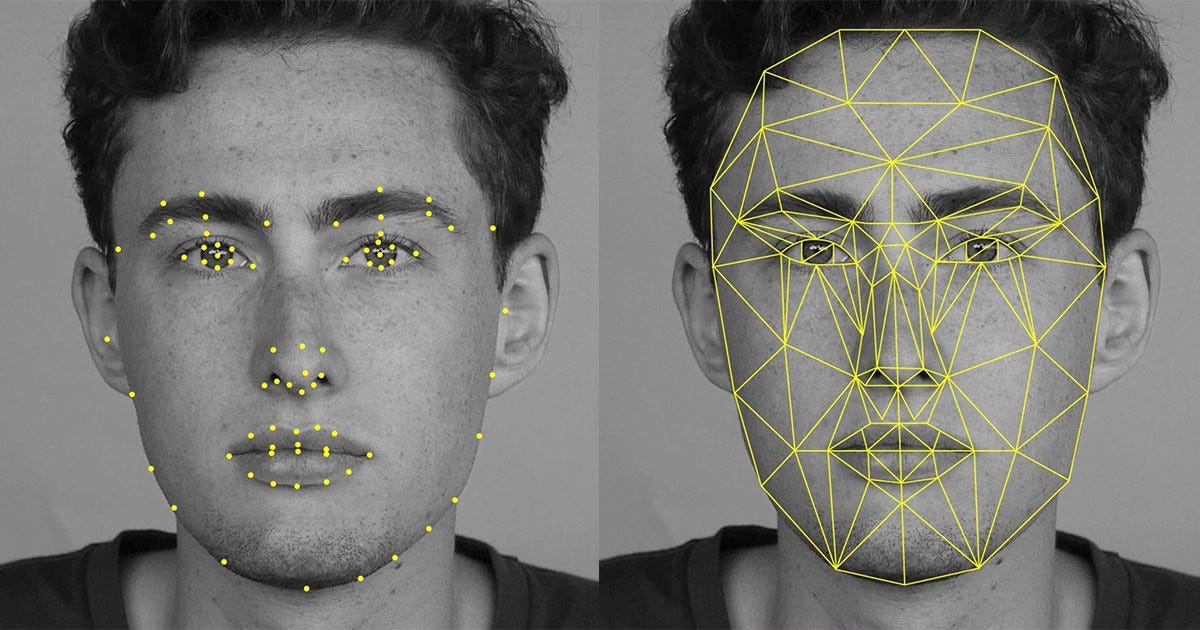

-  The marking of important areas of the face, such as the eyes, corners of the mouth, and nose, that are relevant for a variety of tasks, such as face filters, emotion recognition, and pose recognition, using convolutional neural network and computer vision techniques to perform facial Keypoint detection.

-  It entails forecasting the Facial Key points coordinates for a particular face, such as nose tip, the center of eyes, and so on. To recognize facial key points, we use a Convolutional Neural Network-based model using Autoencoders.

-  Convolutional Neural Networks (CNN) has a deep structure that allows them to extract high-level information and provide better precision when identifying each important point. Convolutional networks are designed to anticipate all points at the same time.

### Import Required Libraries 

In [61]:
import os
import cv2
import keras
import tensorflow
import pandas as pd 
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
#import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Activation
from keras.layers import Flatten, Dense
from keras.layers import normalization
from tensorflow.keras.layers import BatchNormalization
from keras import optimizers
from keras.callbacks import ModelCheckpoint, History


In [62]:
train = pd.read_csv('training.csv', header=0)
test = pd.read_csv('test.csv', header=0)
X_test, y_test = test[:-1], test["Image"]

In [63]:
len(train)

7049

In [64]:
train.T.head()

0          1          2          3     \
left_eye_center_x        66.033564  64.332936  65.057053  65.225739   
left_eye_center_y        39.002274  34.970077  34.909642  37.261774   
right_eye_center_x       30.227008  29.949277  30.903789  32.023096   
right_eye_center_y       36.421678  33.448715  34.909642  37.261774   
left_eye_inner_corner_x  59.582075   58.85617     59.412  60.003339   

                              4          5          6          7         8     \
left_eye_center_x        66.725301  69.680748  64.131866  67.468893  65.80288   
left_eye_center_y        39.621261  39.968748   34.29004  39.413452   34.7552   
right_eye_center_x        32.24481  29.183551  29.578953  29.355961  27.47584   
right_eye_center_y       38.042032  37.563364   33.13804  39.621717   36.1856   
left_eye_inner_corner_x   58.56589  62.864299  57.797154  59.554951  58.65216   

                              9     ...       7039       7040       7041  \
left_eye_center_x        64.121231  ...  69.229935  63.352951  65.711151   
left_eye_center_y        36.740308  ...  38.575634  35.671311  38.843545   
right_eye_center_x       29.468923  ...  29.407912  33.952078  32.268751   
right_eye_center_y       38.390154  ...   38.34545  40.816448  37.706043   
left_eye_inner_corner_x  58.620923  ...        NaN        NaN        NaN   

                              7042       7043       7044       7045  \
left_eye_center_x        67.929319  66.867222  67.402546    66.1344   
left_eye_center_y        35.846552  37.356855  31.842551  38.365501   
right_eye_center_x        28.68782  30.750926  29.746749  30.478626   
right_eye_center_y       41.452484  40.115743  38.632942  39.950198   
left_eye_inner_corner_x        NaN        NaN        NaN        NaN   

                              7046       7047       7048  
left_eye_center_x        66.690732  70.965082  66.938311  
left_eye_center_y        36.845221  39.853666   43.42451  
right_eye_center_x        31.66642  30.543285  31.096059  
right_eye_center_y       39.685042  40.772339  39.528604  
left_eye_inner_corner_x        NaN        NaN        NaN  

[5 rows x 7049 columns]

# Check for null values

In [65]:
print(f'Feature \t\t\t Missing \t Percentage missing\n')
for k,v in train.isna().sum().items():
    print(f'{k !s:30} :{v :8} \t {round(v/len(train),2)}%')

Feature 			 Missing 	 Percentage missing

left_eye_center_x              :      10 	 0.0%
left_eye_center_y              :      10 	 0.0%
right_eye_center_x             :      13 	 0.0%
right_eye_center_y             :      13 	 0.0%
left_eye_inner_corner_x        :    4778 	 0.68%
left_eye_inner_corner_y        :    4778 	 0.68%
left_eye_outer_corner_x        :    4782 	 0.68%
left_eye_outer_corner_y        :    4782 	 0.68%
right_eye_inner_corner_x       :    4781 	 0.68%
right_eye_inner_corner_y       :    4781 	 0.68%
right_eye_outer_corner_x       :    4781 	 0.68%
right_eye_outer_corner_y       :    4781 	 0.68%
left_eyebrow_inner_end_x       :    4779 	 0.68%
left_eyebrow_inner_end_y       :    4779 	 0.68%
left_eyebrow_outer_end_x       :    4824 	 0.68%
left_eyebrow_outer_end_y       :    4824 	 0.68%
right_eyebrow_inner_end_x      :    4779 	 0.68%
right_eyebrow_inner_end_y      :    4779 	 0.68%
right_eyebrow_outer_end_x      :    4813 	 0.68%
right_eyebrow_outer_end_y      

## Train data

<Axes: >

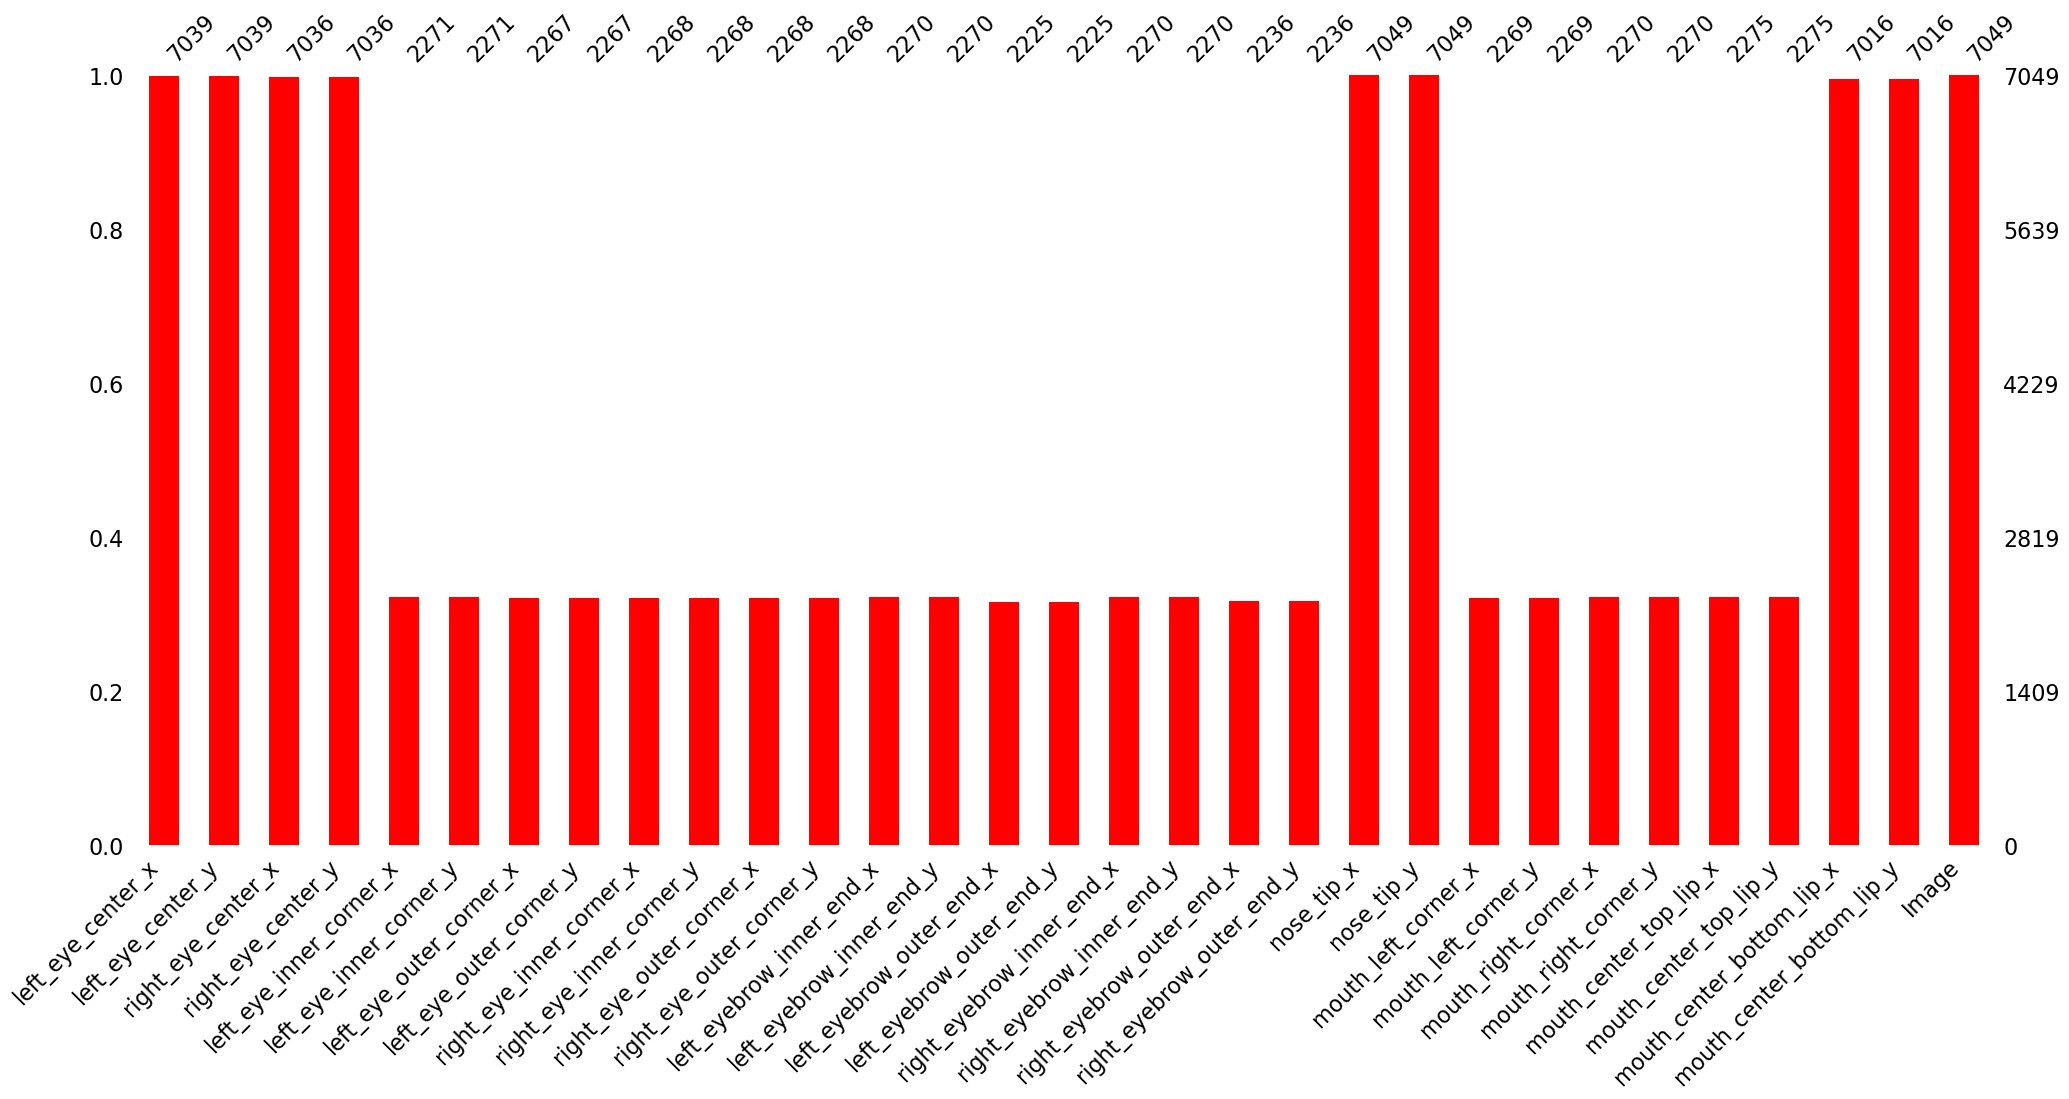

In [66]:
import missingno as msno
msno.bar(train,color=(1, 0, 0))

#  Test data

<Axes: >

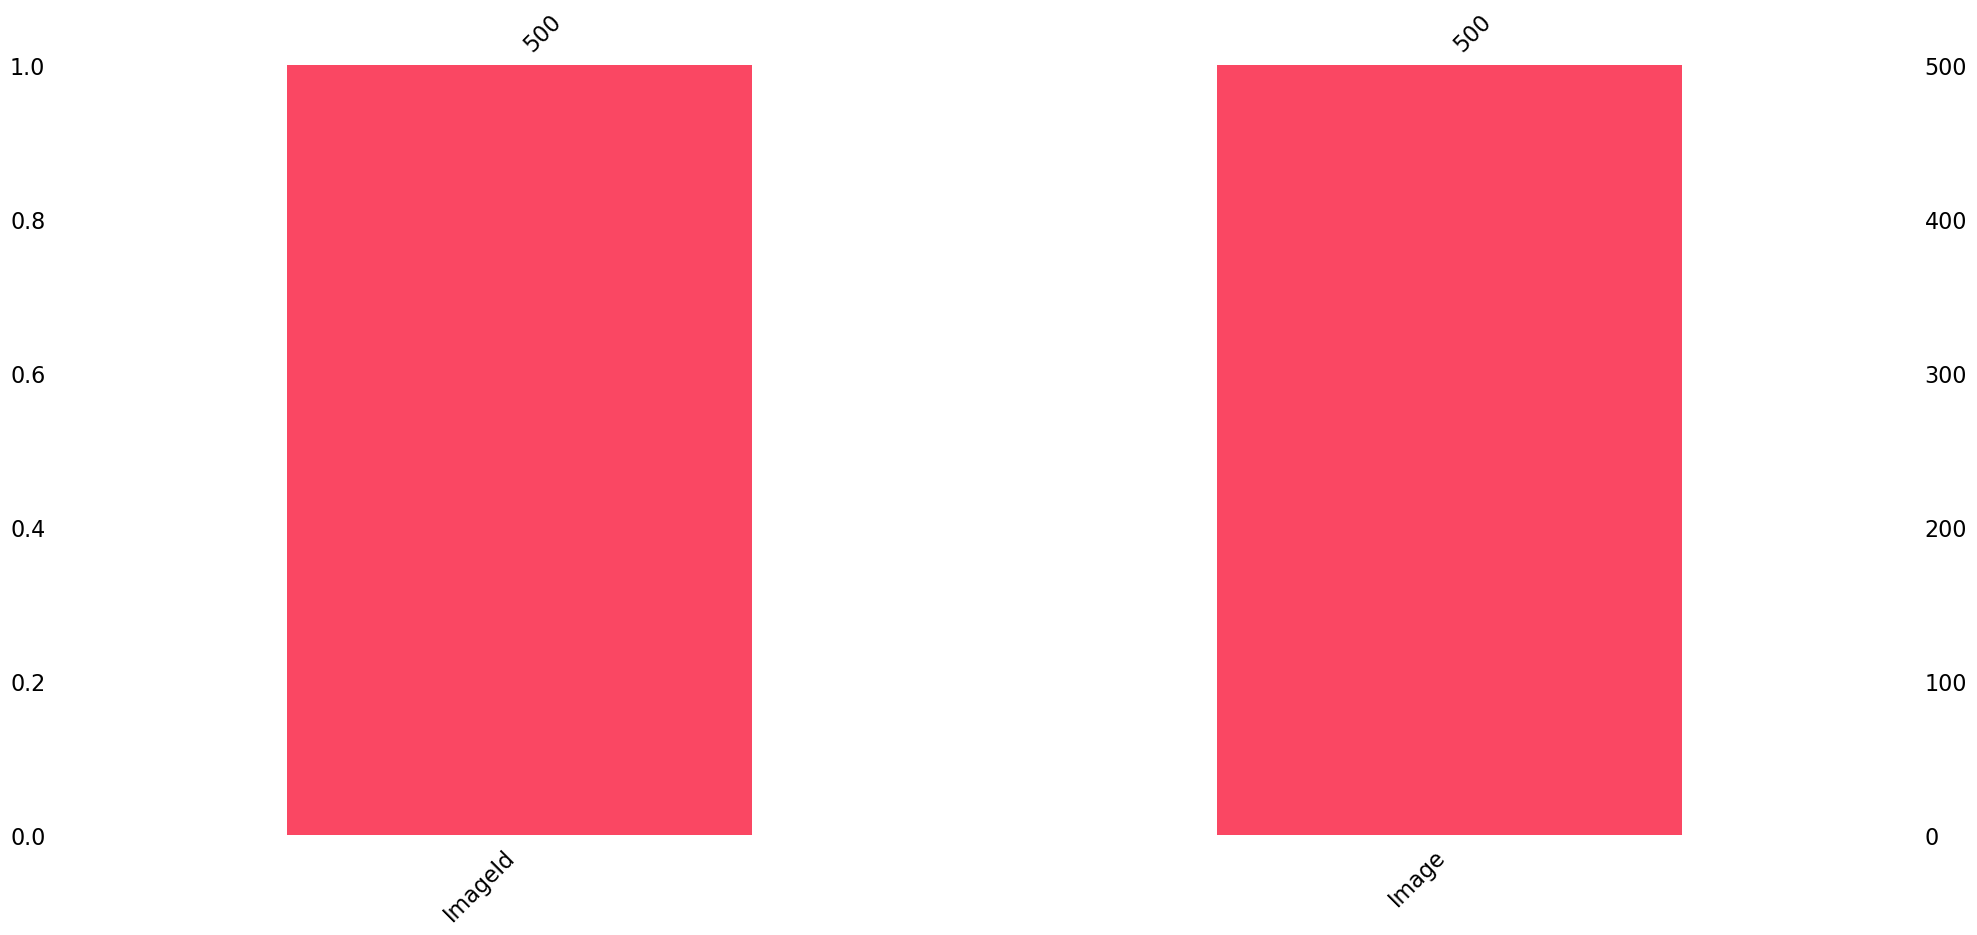

In [67]:
import missingno as msno
msno.bar(test.sample(500),color=(0.98, 0.28, 0.39))

In [68]:
train.dropna(inplace = True)

In [69]:
train.isnull().sum().sum()

0

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 0 to 2283
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [71]:
train['Image'].head()

0    238 236 237 238 240 240 239 241 241 243 240 23...
1    219 215 204 196 204 211 212 200 180 168 178 19...
2    144 142 159 180 188 188 184 180 167 132 84 59 ...
3    193 192 193 194 194 194 193 192 168 111 50 12 ...
4    147 148 160 196 215 214 216 217 219 220 206 18...
Name: Image, dtype: object

In [72]:
len(train)

2140

In [73]:
keys = np.arange(0, 2140)
train = train.set_index(keys)
train.T.head(5)

0          1          2          3     \
left_eye_center_x        66.033564  64.332936  65.057053  65.225739   
left_eye_center_y        39.002274  34.970077  34.909642  37.261774   
right_eye_center_x       30.227008  29.949277  30.903789  32.023096   
right_eye_center_y       36.421678  33.448715  34.909642  37.261774   
left_eye_inner_corner_x  59.582075   58.85617     59.412  60.003339   

                              4          5          6          7         8     \
left_eye_center_x        66.725301  69.680748  64.131866  67.468893  65.80288   
left_eye_center_y        39.621261  39.968748   34.29004  39.413452   34.7552   
right_eye_center_x        32.24481  29.183551  29.578953  29.355961  27.47584   
right_eye_center_y       38.042032  37.563364   33.13804  39.621717   36.1856   
left_eye_inner_corner_x   58.56589  62.864299  57.797154  59.554951  58.65216   

                              9     ...       2130       2131       2132  \
left_eye_center_x        64.121231  ...  66.827593  64.126581  63.738273   
left_eye_center_y        36.740308  ...  30.620361  33.096095  34.407682   
right_eye_center_x       29.468923  ...  25.111875  25.716503  26.854206   
right_eye_center_y       38.390154  ...  33.298484  38.118015  39.145823   
left_eye_inner_corner_x  58.620923  ...  58.383626  57.887226  56.297606   

                              2133       2134       2135       2136  \
left_eye_center_x        64.644616  64.383649  67.180378   65.72449   
left_eye_center_y        34.280084  35.104561  35.816373   36.30102   
right_eye_center_x       28.284307  30.424912  33.239956  25.377551   
right_eye_center_y       38.586911  33.399298  34.921932  37.311224   
left_eye_inner_corner_x   57.75651  57.814386  59.347973  58.530612   

                              2137       2138       2139  
left_eye_center_x        68.430866   64.15218  66.683755  
left_eye_center_y        38.651975  30.691592  34.483429  
right_eye_center_x       28.895857  27.000898   30.78449  
right_eye_center_y       37.617027  40.868082  38.578939  
left_eye_inner_corner_x   61.65935  56.505624  59.255347  

[5 rows x 2140 columns]

In [74]:
type(train)

pandas.core.frame.DataFrame

In [75]:
imag = []  # list of lists(contains pixel values for images)
for i in range(len(train)):
    if i==210 or i==350 or i==499 or i==512 or i==810 or i==839 or i==895 or i==1058 or i==1194:
        continue
    img = train['Image'][i].split(' ')
    img = [pixel if pixel != '' else '0' for pixel in img]
   
    imag.append(img)
    
    
# this or the below one

In [76]:
image_list = np.array(imag, dtype = 'float')
X_train = image_list.reshape(-1, 96, 96, 1)
targets = np.array(train.iloc[:, :-1])

In [77]:
print('Shape of images',X_train.shape)
print('Shape of targets',targets.shape)

Shape of images (2131, 96, 96, 1)
Shape of targets (2140, 30)


In [78]:
#  Visualize
viz = np.array([train['Image'][i].split(' ') for i in range(len(train))],dtype='float')
keys = train.drop(['Image'], axis=1)

C:\Users\PRITI CHAUDHARY\AppData\Local\Temp\ipykernel_7924\894729145.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


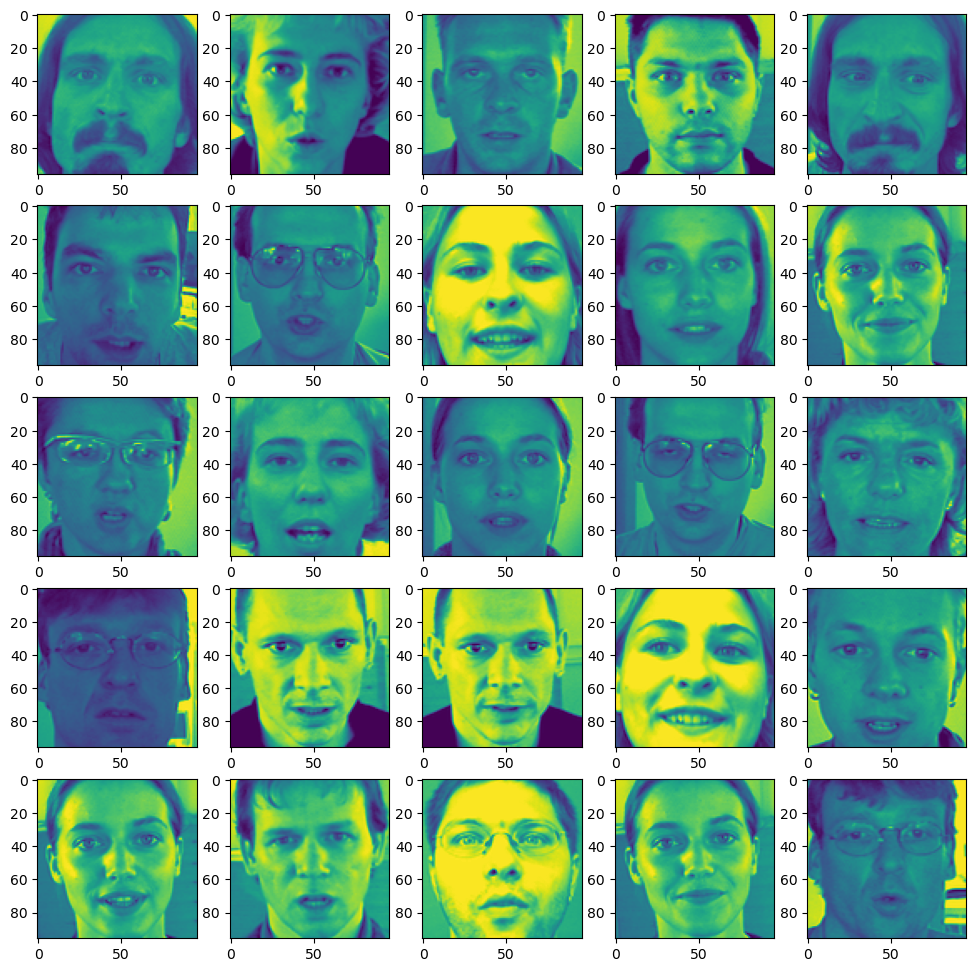

In [79]:
# Gallery using Matplotlib 
fig, ax = plt.subplots(5, 5, figsize = (12,12), dpi = 100)
axes = ax.ravel()

for idx,ax  in enumerate(axes):
    ax.imshow(viz[idx].reshape(96, 96, 1))
    photo_visualize_pnts = keys.iloc[idx].values
fig.show()

C:\Users\PRITI CHAUDHARY\AppData\Local\Temp\ipykernel_7924\1611770724.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


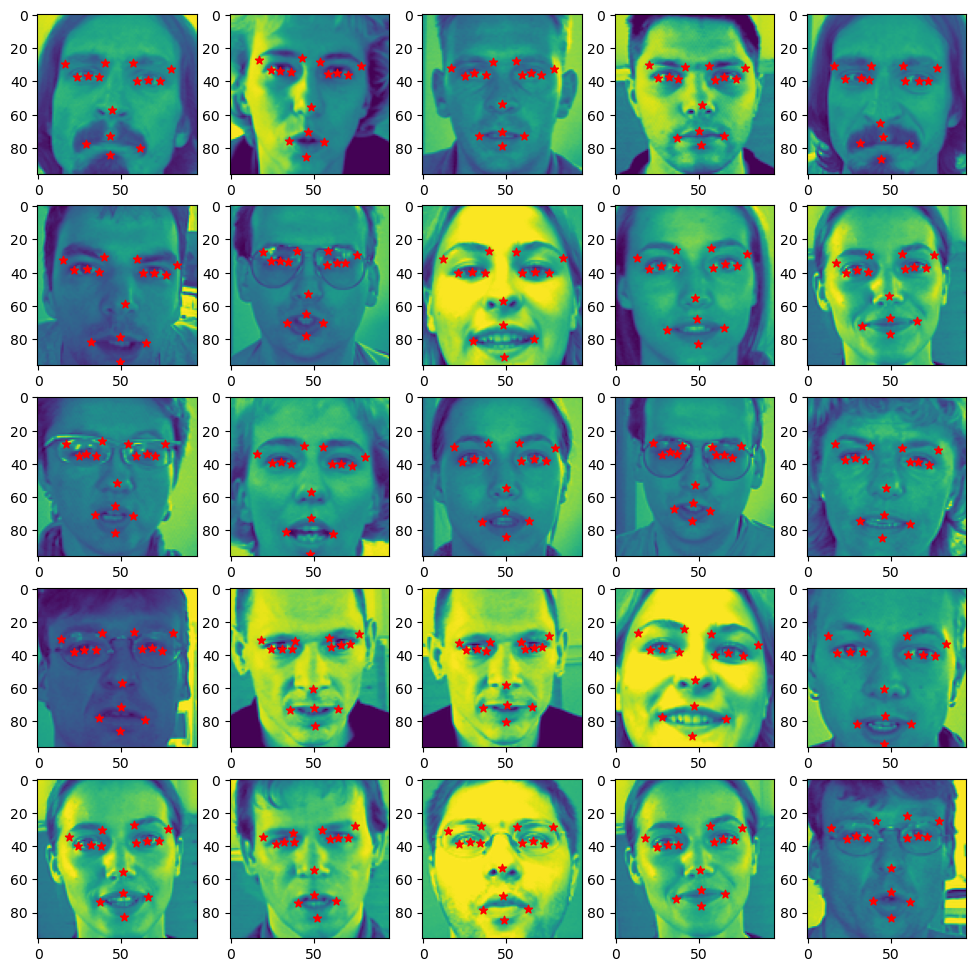

In [80]:
# Gallery using Matplotlib 
fig, ax = plt.subplots(5, 5, figsize = (12,12), dpi = 100)
axes = ax.ravel()

for idx,ax  in enumerate(axes):
    ax.imshow(viz[idx].reshape(96, 96, 1))
    photo_visualize_pnts = keys.iloc[idx].values
    ax.scatter(photo_visualize_pnts[0::2], photo_visualize_pnts[1::2], c='Red', marker='*')
fig.show()

## Augmentation
We can add different augmenations like -

*  flipping
*  rotation
*  cropping
*  adding noise
*  bluring
*  brightness

etc..



In [81]:
# lets create an util to display the augumentation
def display_augmentation(img, feat, img_f, feat_f):
    plt.figure(figsize=(8,8))
    plt.subplot(2,2,1)
    plt.scatter(feat[0::2],-feat[1::2],c='r',marker='x')
    plt.subplot(2,2,2)
    plt.scatter(feat_f[0::2],-feat_f[1::2],c='r',marker='x')
    plt.subplot(2,2,3)
    display_images(img, feat)
    plt.subplot(2,2,4)
    display_images(img_f, feat_f)

### Flipping

In [82]:
# lets make an util that give us flipped images and targets
def flipping_augmentation(images, features):
    flipped_images = np.flip(images, axis=2)
    
    flipped_features = features.copy()
    for i, feat in enumerate(flipped_features):
        for j, val in enumerate(feat):
            if j%2==0:
                flipped_features[i][j] = 96-val
            
    return flipped_images, flipped_features

# let create an object to keep track of the augmentations
augmentation_functions = {
    'flip' : flipping_augmentation
}

### Cropping 

In [83]:
# lets make an util that give us cropped images and targets
def crop_augmentation(images, targets):
    cropped_images = images.copy()

    for i in range(len(images)):
        cropped_images[i,:,:10] = 0
        cropped_images[i,:,86:] = 0
        cropped_images[i,:10,:] = 0
        cropped_images[i,86:,:] = 0

    return cropped_images, targets


augmentation_functions['crop']=crop_augmentation
    

### Brightness

In [84]:
# lets create an util that adds brightness
def brightness_augmentation(images, features, factor=1.5):
    bright = []
    for img in images:
        bright.append(np.clip(img*factor, 0, 255))
    return np.array(bright), features

augmentation_functions['brightness'] = brightness_augmentation

### Adding noise 

In [85]:
# lets create an utility that adds noise to the image
def noise_augmentation(images, features, factor):
    augmented = []
    noise = np.random.randint(low=0, high=255, size=images.shape[1:])
    for img in images:
        img = img + (noise*factor)
        augmented.append(img)
    
    return np.array(augmented), features

augmentation_functions['noise'] = noise_augmentation

### Lets prepare our training data

In [86]:
print('Shape of image data', X_train.shape)
print('Shape of target data', targets.shape)

Shape of image data (2131, 96, 96, 1)
Shape of target data (2140, 30)


In [87]:
# ADDING AUGMENTATION

def augmentation(img, feat , method):
    aug_img, aug_feat = method
    img = np.concatenate([img,aug_img])
    feat = np.concatenate([feat,aug_feat])
    return img, feat


# flip
method = flipping_augmentation(X_train, targets)
augmented_images, augmented_targets = augmentation(X_train, targets, method)
print('image augmentation : flipping')

# crop
method = crop_augmentation(X_train, targets)
augmented_images, augmented_targets = augmentation(augmented_images, augmented_targets, method)
print('image augmentation : cropping')

# brightness
method = brightness_augmentation(X_train, targets, factor=2.0)
augmented_images, augmented_targets = augmentation(augmented_images, augmented_targets, method)
print('image augmentation : adding brightness')


# noise
method = noise_augmentation(X_train, targets, factor=0.2)
augmented_images, augmented_targets = augmentation(augmented_images, augmented_targets, method)
print('image augmentation : adding noise')


image augmentation : flipping
image augmentation : cropping
image augmentation : adding brightness
image augmentation : adding noise


In [88]:
print('Shape of data after augmentation')
print('Shape of image data',augmented_images.shape)
print('Shape of target data', augmented_targets.shape)

Shape of data after augmentation
Shape of image data (10655, 96, 96, 1)
Shape of target data (10700, 30)


In [89]:
# lets create an util that will display the images
def display_images(img, feat):
    plt.imshow(img, cmap=plt.cm.gray);
    plt.scatter(feat[0::2], feat[1::2], c='r', marker='x')
    

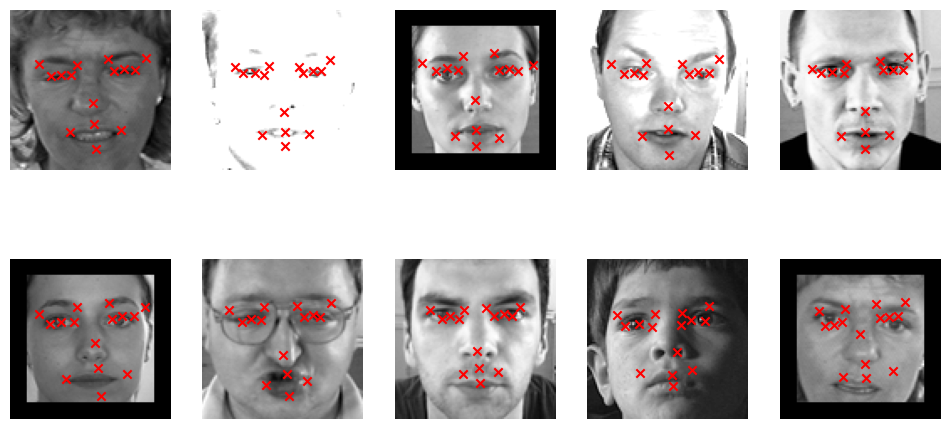

In [90]:
# lets check our data one last time before we start building models

def visualize_data(images, targets):
    plt.figure(figsize=(12,12))
    for i in range(10):
        idx = np.random.randint(images.shape[0])
        plt.subplot(2,5,i+1)
        display_images(images[idx], targets[idx])
        plt.axis('off')
    plt.subplots_adjust(bottom=0.5)
    plt.show()

visualize_data(augmented_images, augmented_targets)

### Modeling
MobileNetV2 is very similar to the original MobileNet, except that it uses inverted residual blocks with bottlenecking features. It has a drastically lower parameter count than the original MobileNet. MobileNets support any input size greater than 32 x 32, with larger image sizes offering better performance.

 

In [91]:
pretrained_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(96,96,3),include_top=False,weights='imagenet')
# pretrained_model = tf.keras.applications.resnet_v2.ResNet50V2(input_shape=(96,96,3),include_top=False,weights='imagenet')


Each Keras Application expects a specific kind of input preprocessing. For MobileNetV2, call tf.keras.applications.mobilenet_v2.preprocess_input on your inputs before passing them to the model. mobilenet_v2.preprocess_input will scale input pixels between -1 and 1.

In [92]:
%%time
augmented_images = tf.keras.applications.mobilenet_v2.preprocess_input(augmented_images)
# augmented_images = tf.keras.applications.resnet_v2.preprocess_input(augmented_images)

CPU times: total: 219 ms
Wall time: 188 ms


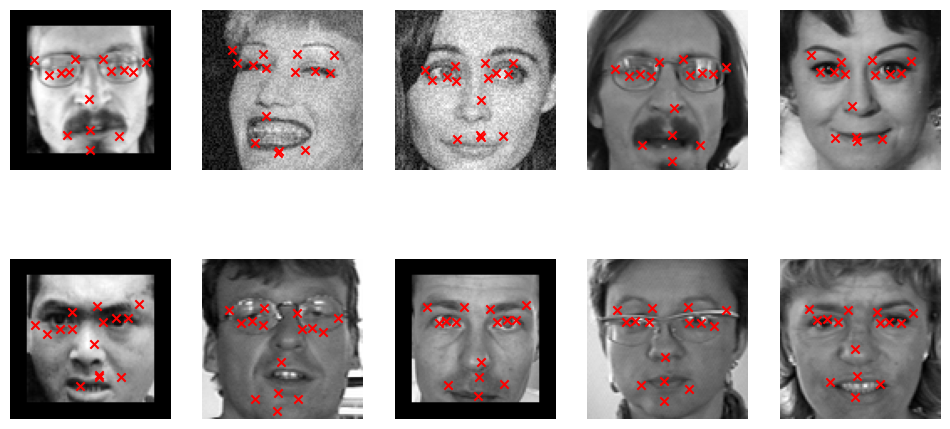

CPU times: total: 297 ms
Wall time: 301 ms


In [93]:
%%time

# lets check our data to make sure everything is fine

visualize_data(augmented_images,augmented_targets)

In [98]:
augmented_images.shape

(10655, 96, 96, 1)

In [99]:
augmented_targets.shape

(10700, 30)

In [102]:
images_ds = tf.data.Dataset.from_tensor_slices(augmented_images)
targets_ds = tf.data.Dataset.from_tensor_slices(augmented_targets)

ds = tf.data.Dataset.zip((images_ds, targets_ds))
ds = ds.shuffle(buffer_size=augmented_targets.shape[0])
ds = ds.batch(64)
ds = ds.prefetch(tf.data.AUTOTUNE)

In [103]:
train_ds = ds.skip(10).shuffle(100)
val_ds = ds.take(10)

In [104]:
# create a preprocessing layer
class ImageTile(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__(trainable = False)
        
    def call(self, inputs):
        return tf.tile(inputs,tf.constant([1,1,1,3]))


In [105]:
def FFNN(units):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(units),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
    ])


In [106]:
block = []
for units in [512,256,128,64]:
    block.append(FFNN(units))

In [107]:
model = tf.keras.Sequential([
    
    tf.keras.Input(shape=(96,96,1)),
    
    ImageTile(),
    
    pretrained_model,
    
    tf.keras.layers.GlobalMaxPooling2D(),
    
    *block,

    tf.keras.layers.Dense(30)

    
])

In [108]:
model.layers[1].trainable=False

In [109]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy', 'mae', 'mse'])

In [110]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_tile (ImageTile)      (None, 96, 96, 3)         0         
                                                                 
 mobilenetv2_1.00_96 (Functi  (None, 3, 3, 1280)       2257984   
 onal)                                                           
                                                                 
 global_max_pooling2d (Globa  (None, 1280)             0         
 lMaxPooling2D)                                                  
                                                                 
 sequential (Sequential)     (None, 512)               657920    
                                                                 
 sequential_1 (Sequential)   (None, 256)               132352    
                                                                 
 sequential_2 (Sequential)   (None, 128)              

In [111]:
import math
# decaying learing rate
def decay_lr(epoch):
  return 0.01*math.pow(0.77,epoch)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(decay_lr)

lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(patience=2)
    
    
early_stopping = tf.keras.callbacks.EarlyStopping(
                        monitor='val_loss',
                        patience=3,
                        restore_best_weights=True)

In [112]:
#  Fit the model! / Train the model!

In [113]:
history = model.fit(train_ds, epochs=20, 
                    validation_data=val_ds, 
                    callbacks=[early_stopping,lr_on_plateau])

Epoch 1/20
157/157 [==============================] - 47s 212ms/step - loss: 2327.1487 - accuracy: 0.1133 - mae: 44.4922 - mse: 2327.1487 - val_loss: 2047.7054 - val_accuracy: 0.1297 - val_mae: 41.3341 - val_mse: 2047.7054 - lr: 0.0010
Epoch 2/20
157/157 [==============================] - 32s 203ms/step - loss: 1520.9590 - accuracy: 0.0969 - mae: 34.3809 - mse: 1520.9590 - val_loss: 1249.0944 - val_accuracy: 0.0562 - val_mae: 30.5544 - val_mse: 1249.0944 - lr: 0.0010
Epoch 3/20
157/157 [==============================] - 30s 193ms/step - loss: 742.3386 - accuracy: 0.1046 - mae: 21.7495 - mse: 742.3386 - val_loss: 588.4368 - val_accuracy: 0.1703 - val_mae: 19.0861 - val_mse: 588.4368 - lr: 0.0010
Epoch 4/20
157/157 [==============================] - 29s 183ms/step - loss: 308.8727 - accuracy: 0.3583 - mae: 12.7053 - mse: 308.8727 - val_loss: 232.5753 - val_accuracy: 0.4938 - val_mae: 10.9727 - val_mse: 232.5753 - lr: 0.0010
Epoch 5/20
157/157 [==============================] - 28s 176ms/

In [114]:
test.head()

ImageId                                              Image
0        1  182 183 182 182 180 180 176 169 156 137 124 10...
1        2  76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2        3  177 176 174 170 169 169 168 166 166 166 161 14...
3        4  176 174 174 175 174 174 176 176 175 171 165 15...
4        5  50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...

In [115]:
 def get_images(test):   
    image = []
    for i in range(0, len(test)):
        img = test['Image'][i].split(' ')
        img = ['0' if x=='' else x for x in img]
        image.append(img)

    image_list = np.array(image, dtype = 'float')
    test_images = image_list.reshape(-1, 96, 96, 1)
    
    return test_images

In [116]:
test_images = get_images(test)
test_images = tf.keras.applications.mobilenet_v2.preprocess_input(test_images)
test_ds = tf.data.Dataset.from_tensor_slices((test_images)).batch(64)

### Predictions 

In [117]:
test_preds = model.predict(test_ds)

28/28 [==============================] - 10s 174ms/step


In [118]:
print('Shape of test predictions', test_preds.shape)

Shape of test predictions (1783, 30)


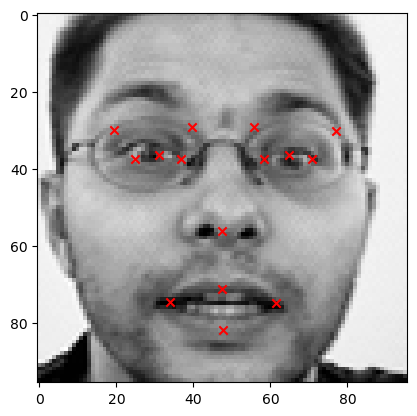

In [119]:
display_images(test_images[0],test_preds[0])

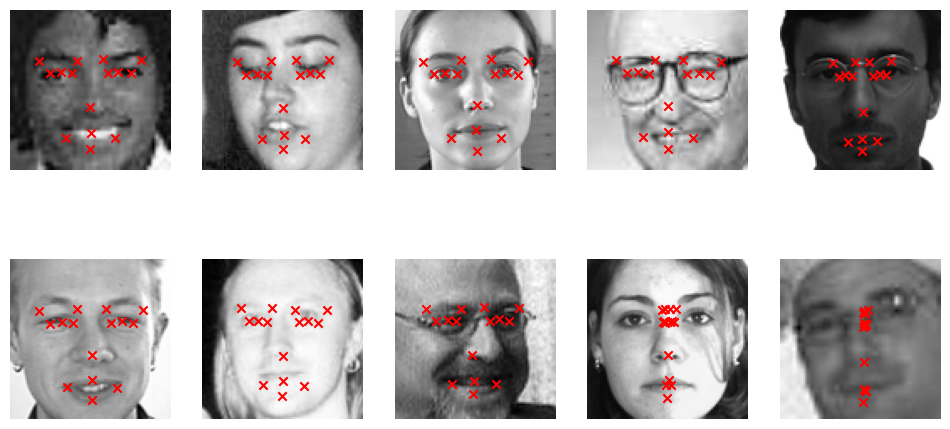

In [120]:
visualize_data(test_images,test_preds)

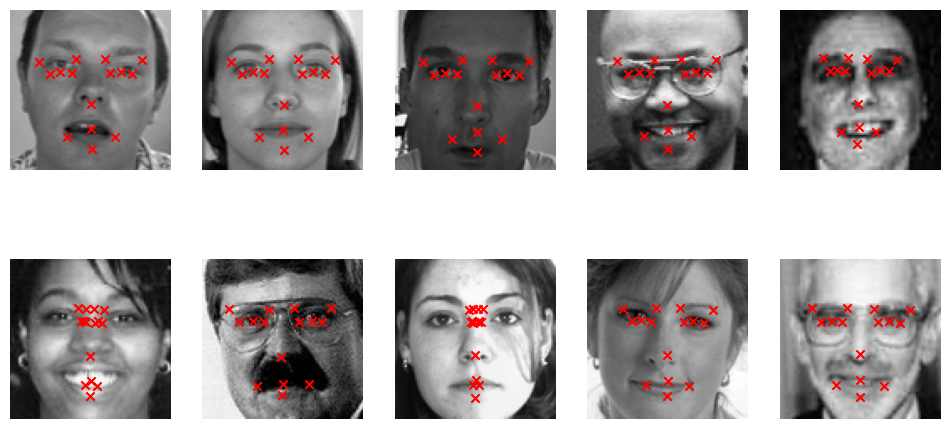

In [121]:
visualize_data(test_images,test_preds) 

### Fine tune the model
Now that our model is trained, Lets fine tune it

In [122]:
# how many layers are there in the pre-trained model ?
print('Layers in pre-trained model' ,len(model.layers[1].layers))

# these layers are not trainable, we set trainable = False in the begining
# lets make some of the top layers trainable

Layers in pre-trained model 154


In [123]:
model.layers[1].trainable = True

In [124]:
for layer in model.layers[1].layers[:-50]:
    layer.trainable=False

In [125]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy', 'mae', 'mse'])

In [126]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_tile (ImageTile)      (None, 96, 96, 3)         0         
                                                                 
 mobilenetv2_1.00_96 (Functi  (None, 3, 3, 1280)       2257984   
 onal)                                                           
                                                                 
 global_max_pooling2d (Globa  (None, 1280)             0         
 lMaxPooling2D)                                                  
                                                                 
 sequential (Sequential)     (None, 512)               657920    
                                                                 
 sequential_1 (Sequential)   (None, 256)               132352    
                                                                 
 sequential_2 (Sequential)   (None, 128)              

In [127]:
lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(patience=2)

early_stopping = tf.keras.callbacks.EarlyStopping(
                        monitor='val_loss',
                        patience=3,
                        restore_best_weights=True)


history = model.fit(train_ds, epochs=10, 
                    validation_data=val_ds, 
                    callbacks=[early_stopping,lr_on_plateau])

Epoch 1/10
157/157 [==============================] - 60s 348ms/step - loss: 69.4985 - accuracy: 0.6803 - mae: 4.6115 - mse: 69.4985 - val_loss: 90.6412 - val_accuracy: 0.6266 - val_mae: 5.4670 - val_mse: 90.6412 - lr: 0.0010
Epoch 2/10
157/157 [==============================] - 53s 336ms/step - loss: 37.7679 - accuracy: 0.6930 - mae: 3.3986 - mse: 37.7679 - val_loss: 118.6622 - val_accuracy: 0.6969 - val_mae: 5.3193 - val_mse: 118.6622 - lr: 0.0010
Epoch 3/10
157/157 [==============================] - 53s 339ms/step - loss: 30.5132 - accuracy: 0.6909 - mae: 3.1401 - mse: 30.5132 - val_loss: 45.8760 - val_accuracy: 0.6828 - val_mae: 3.2856 - val_mse: 45.8760 - lr: 0.0010
Epoch 4/10
157/157 [==============================] - 53s 335ms/step - loss: 26.8158 - accuracy: 0.6909 - mae: 2.9631 - mse: 26.8158 - val_loss: 46.7648 - val_accuracy: 0.7328 - val_mae: 3.8605 - val_mse: 46.7648 - lr: 0.0010
Epoch 5/10
157/157 [==============================] - 51s 322ms/step - loss: 25.1078 - accurac

In [128]:
#  prediction after fine-tuning

In [129]:
test_preds = model.predict(test_ds)

28/28 [==============================] - 5s 151ms/step


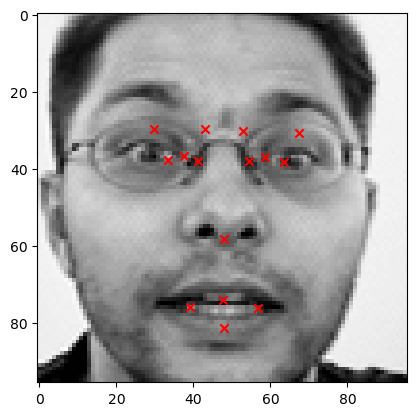

In [130]:
display_images(test_images[0],test_preds[0])

In [131]:
def data_loader():
    
    # Load dataset file
    data_frame = pd.read_csv('training.csv')
    
    data_frame['Image'] = data_frame['Image'].apply(lambda i: np.fromstring(i, sep=' '))
    data_frame = data_frame.dropna()  # Get only the data with 15 keypoints
   
    # Extract Images pixel values
    imgs_array = np.vstack(data_frame['Image'].values)/ 255.0
    imgs_array = imgs_array.astype(np.float32)    # Normalize, target values to (0, 1)
    imgs_array = imgs_array.reshape(-1, 96, 96, 1)
        
    # Extract labels (key point cords)
    labels_array = data_frame[data_frame.columns[:-1]].values
    labels_array = (labels_array - 48) / 48    # Normalize, traget cordinates to (-1, 1)
    labels_array = labels_array.astype(np.float32) 
    
    # shuffle the train data
#     imgs_array, labels_array = shuffle(imgs_array, labels_array, random_state=9)  
    
    return imgs_array, labels_array

In [132]:
# # This snippet is just to check/verify data
# imgs, labels = data_loader()
# print(imgs.shape)
# print(labels.shape)

# n=0
# labels[n] = (labels[n]*48)+48
# image = np.squeeze(imgs[n])
# plt.imshow(image, cmap='gray')
# plt.plot(labels[n][::2], labels[n][1::2], 'ro')
# plt.show()

In [133]:
# Main model
def the_model():
    model = Sequential()
    
    model.add(Conv2D(16, (3,3), padding='same', activation='relu', input_shape=X_train.shape[1:])) # Input shape: (96, 96, 1)
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    # Convert all values to 1D array
    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(30))
    
    return model


In [134]:
X_train, y_train = data_loader()
print("Training datapoint shape: X_train.shape:{}".format(X_train.shape))
print("Training labels shape: y_train.shape:{}".format(y_train.shape))

Training datapoint shape: X_train.shape:(2140, 96, 96, 1)
Training labels shape: y_train.shape:(2140, 30)


In [135]:
epochs = 60
batch_size = 64

model = the_model()
hist = History()

checkpointer = ModelCheckpoint(filepath='checkpoint1.hdf5', 
                               verbose=1, save_best_only=True)


In [136]:
# Compile Model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [137]:
model_fit = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, hist], verbose=1)

model.save('model1.h5')


Epoch 1/60
27/27 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.4679
Epoch 1: val_loss improved from inf to 0.01128, saving model to checkpoint1.hdf5
27/27 [==============================] - 8s 269ms/step - loss: 0.0443 - accuracy: 0.4679 - val_loss: 0.0113 - val_accuracy: 0.4229
Epoch 2/60
27/27 [==============================] - ETA: 0s - loss: 0.0106 - accuracy: 0.6262
Epoch 2: val_loss improved from 0.01128 to 0.00871, saving model to checkpoint1.hdf5
27/27 [==============================] - 7s 239ms/step - loss: 0.0106 - accuracy: 0.6262 - val_loss: 0.0087 - val_accuracy: 0.4322
Epoch 3/60
27/27 [==============================] - ETA: 0s - loss: 0.0073 - accuracy: 0.6338
Epoch 3: val_loss improved from 0.00871 to 0.00801, saving model to checkpoint1.hdf5
27/27 [==============================] - 6s 234ms/step - loss: 0.0073 - accuracy: 0.6338 - val_loss: 0.0080 - val_accuracy: 0.4322
Epoch 4/60
27/27 [==============================] - ETA: 0s - loss: 0.0062

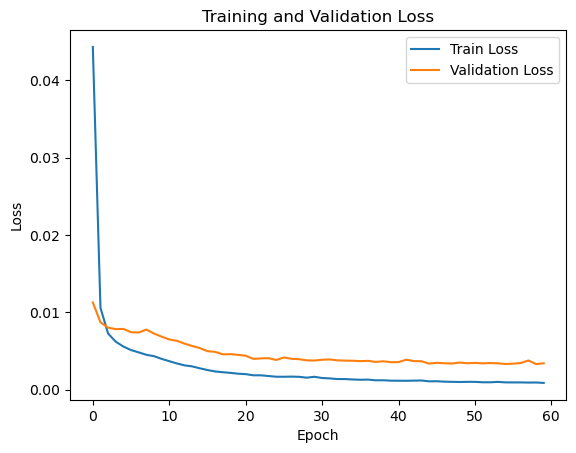

In [138]:
# Plot train and validation loss
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [139]:
#####  TEST YOUR IMAGE FILE WITH THE MODEL  #####


import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import time

In [140]:
def detect_points(face_img):
    me  = np.array(face_img)/255
    x_test = np.expand_dims(me, axis=0)
    x_test = np.expand_dims(x_test, axis=3)

    y_test = model.predict(x_test)
    label_points = (np.squeeze(y_test)*48)+48 
    
    return label_points

In [141]:
cv2.CascadeClassifier
# Load haarcascade
face_cascade = cv2.CascadeClassifier('C:\\Users\\PRITI CHAUDHARY\\Python\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
dimensions = (96, 96)

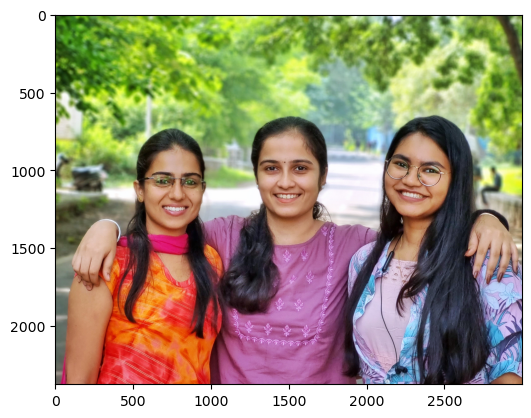

In [142]:
# Enter the path to your test image
img = cv2.imread('trio.jpeg')
default_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(default_img)

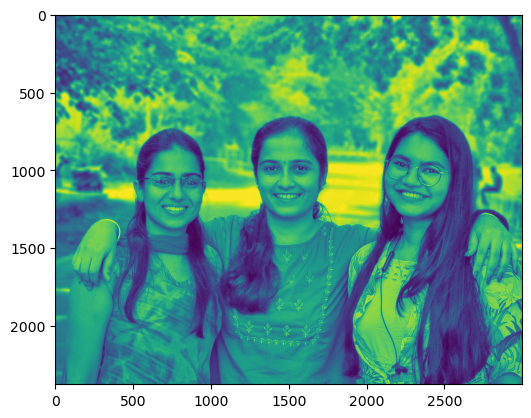

In [143]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)

In [144]:
faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
faces_img = np.copy(gray_img)
plt.rcParams["axes.grid"] = False


1/1 [==============================] - 0s 109ms/step


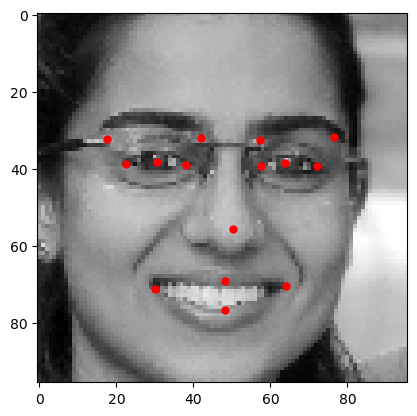

1/1 [==============================] - 0s 31ms/step


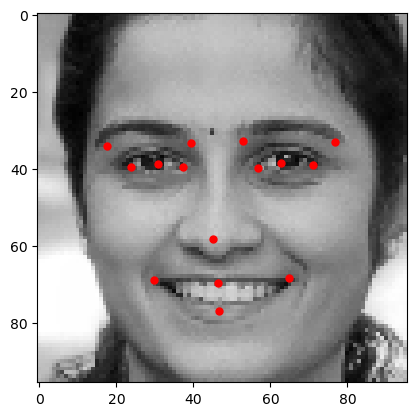

1/1 [==============================] - 0s 16ms/step


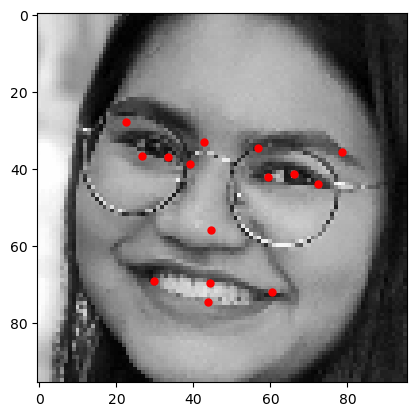

1/1 [==============================] - 0s 16ms/step


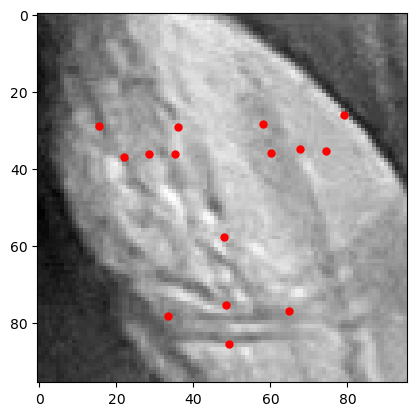

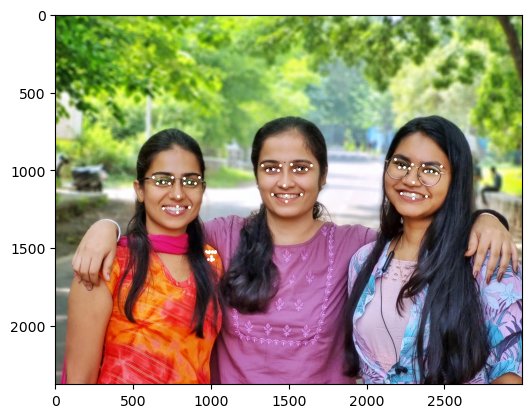

In [145]:
all_x_cords = []
all_y_cords = []

for i, (x,y,w,h) in enumerate(faces):
    
    h += 10
    w += 10
    x -= 5
    y -= 5
    
    just_face = cv2.resize(gray_img[y:y+h,x:x+w], dimensions)
    cv2.rectangle(faces_img,(x,y),(x+w,y+h),(255,0,0),1)
    
    scale_val_x = w/96
    scale_val_y = h/96
    
    label_point = detect_points(just_face)
    all_x_cords.append((label_point[::2]*scale_val_x)+x)
    all_y_cords.append((label_point[1::2]*scale_val_y)+y)
   
   
    plt.imshow(just_face, cmap='gray')
    plt.plot(label_point[::2], label_point[1::2], 'ro', markersize=5)
    plt.show()
    
    
plt.imshow(default_img)    
plt.plot(all_x_cords, all_y_cords, 'wo',  markersize=1)
plt.show()

In [ ]:
# visualize_data(test_images,test_preds)

In [ ]:
# Visualize missing data 
# msno.bar(train_data,figsize=(18,3), color=COLORS[0])

In [ ]:
#    https://www.kaggle.com/code/enzomagal/how-to-deal-with-missing-values

In [ ]:
# train_without_left_eye = train_data.iloc[np.where(train_data['left_eye_center_x'].isna())[0]]
# plot_images(train_without_left_eye, 10, 0.4)